# King County Real-estate Analysis and Modelling.

## $The Alpha Tennent Consultancy:$
* Leah Kalumba.
* Joshua Rwanda.
* Edna Wanjiku.
* Martin Kinoti.
* Stephanie Mbithe.
* Florence Nguuni.

## Business Problem

##  Introduction
The realestate business has for a long time been of great interest to investors. Any party interested in investing in the realestate business will undoubtedly benefit from prior analysis of already existing data on the state of the market in order to minimize risk and maximize ROI. 
We got data from various sources such as the `kc_house_data.csv` file from Kaggle that we are going to perform anlysis and modelling on.



## 1. Project Overview
In our analysis, we explored the data provided by Alpha Tennent Stakeholders and build a multiple linear regression model with some of the features stipulated in the dataset. Hencefourth, the analaysis done and the results came to a solution and on the following factors that have a significant impact on the price of the King County Dataset:

* Have a house by the waterfront
* Increase the number of bathrooms as the number of bedrooms increases
* Improve the overall grade of the home
* Strive to maintain the house to ensure that its in good condition
* Increase the number of floors and the size of the basement

### 1.1 Problem Statement
We will be reviewing building grade, square-footage of living space, and location-related factors such as proximity to schools, coffee shops, parks, and scientology churches to determine which factors are highly correlated with home sale prices.

### 1.2 Objective

#### Main Objective
The main objective is to come up with a predictive /accurate model that is an improvement of the baseline model for better house price prediction in King County.

#### Specific Objectives
- To find out how renovation status affects sale price?
- To determine whether how the number of bedrooms is related to the pricing of the house?
- To determine if the floor number affects the pricing of the house?
- To relate the year built affects/ is related to the house pricing?
- To find whether the condition of the house is related to the house pricing?

### 1.3 Experimental Design Taken.
Implement changes as we go on with the project

This phase is broken down into four tasks together with its projected outcome or output in detail:

Collect Initial Data
Describe Data
Explore Data
Verify Data Quality
There was no need to collect any data for this project as it was already provided by the stakeholder. The data consists of house data from King County and is in .csv format.

### 1.4 Columns Descriptions

The main dataset we are using comes from the King County housing [dataset](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction) that contains information on house sales between May 2014 and May 2015 consist of the following variables:

- date: Date of house sale
- price: The price which the house sold for
- bedrooms: How many bedrooms the house has
- bathrooms: How many bathrooms the house has
- sqft_living: How much square footage the house has
- sqft_lot: How much square footage the lot has
- floors: How many floors the house has
- waterfront: Whether the house is on the - - - - waterfront. Originally contained ‘YES’ or ‘NO’, converted to 0 or 1 for comparative purposes
- view: Whether the house has a view and whether it’s fair, average, good, or excellent. Converted to numberical (0-4) for comparative purposes
- condition: overall condition of the house: Poor, Fair, Average, Good, Very Good
- grade: Numerical grading for house
- sqft_above: How much of the houses square footage is above ground
- sqft_basement: How much of the square footage is in the basement
- yr_built: Year the house was built
- yr_renovated: Year the house was renovated, if applicable
- zipcode: House zipcode
- lat: House’s latitude coordinate
- long: House’s longitude coordinate
- sqft_living15: Average size of living space for the closest 15 houses
- sqft_lot15: Average size of lot for the - - closest 15 houses

## 2. Data Exploration & Data Preparation

* #### To start with, we imported the Python libraries necessary for the analysis.

In [1]:
# importing libraries for data handling
import numpy as np
import pandas as pd
# importing libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
#import missingno as msno confirm how to import it and its purpose
import folium
import warnings
# importing libraries for data handling
import numpy as np
import pandas as pd

# importing libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
#import missingno as msno confirm how to import it and its purpose
import folium
import warnings
# importing libraries for modeling
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import metrics as metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

# importing libraries for statistics
import scipy.stats as stats

# importing libraries for styling
plt.style.use('seaborn')
sns.set_style('whitegrid')

warnings.filterwarnings('ignore')

# For Mapping
import geopandas as gpd # geospatial data
from shapely.geometry import Point
import folium #interactive leaflet map
from folium.plugins import FloatImage
from shapely.geometry import Point

/tmp/ipykernel_32179/3719487860.py:37: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


* #### DATA UNDERSTANDING.

In [2]:
#data file path
data_path = 'data/kc_house_data.csv'

#import main data file and view the first 5 columns using the .head function.
raw_data = pd.read_csv(data_path)
raw_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


* Creating a graph that plots the location of houses sold.

For more information see this blog post: https://towardsdatascience.com/easy-steps-to-plot-geographic-data-on-a-map-python-11217859a2db

In [3]:
# Using an online resource to create a map within specefic longitude and latitude coordinates
BBox = (-122.434, -121.604,      
         47.3643, 47.777)
BBox

(-122.434, -121.604, 47.3643, 47.777)

In [4]:
# create a more interpretable variable for the map
alpha_map = plt.imread(r'KC_simplemap_Oct2013.jpg')

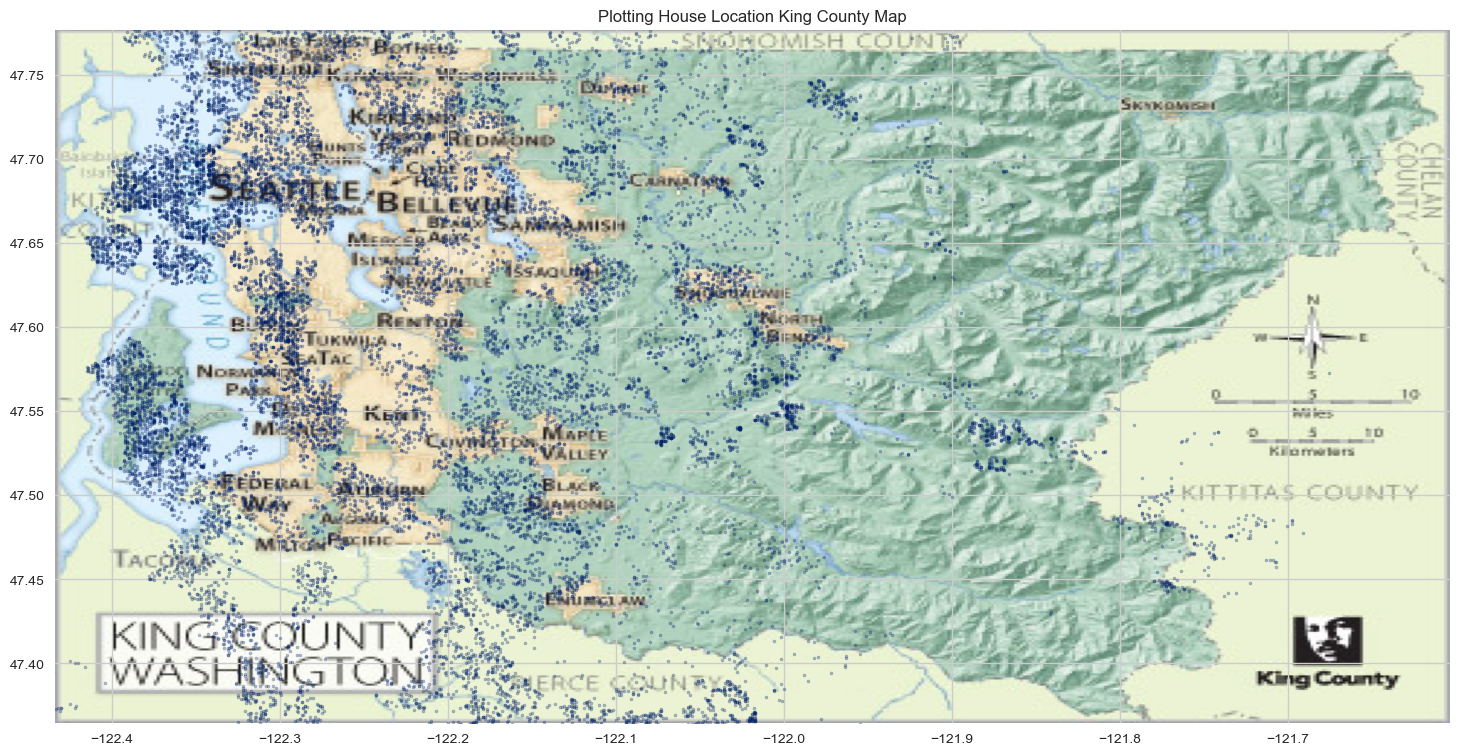

In [5]:
fig, ax = plt.subplots(figsize=(18, 15))

ax.scatter(raw_data.long, raw_data.lat, alpha= 0.3, c='#012169', s=5)
ax.set_title('Plotting House Location King County Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(alpha_map, zorder=0, extent = BBox, aspect= 'equal')
plt.show()


In [6]:
mymap = folium.Map(location= [47.56 , -122.22], zoom_start =9) 

# # Get the highest average house price
maxave = int(raw_data.groupby(['zipcode']).mean()['price'].max())
print("Highest City House Price is: ", maxave)

# # Create a color map to match house prices. White - low price, Black - high price
colormap = ['#00009B' ,'#0099FF' ,'#63FF9B' ,'#FFFB00' ,'#FF2F00' , '#8B0000']

# # Add marker info 

for index, row in raw_data.groupby('zipcode').agg({'lat': 'mean','long': 'mean', 'price':'mean', 'zipcode':'count' }).iterrows(): 
#     # Set icon color based on price 
    theCol = colormap[ int((len(colormap) - 1 ) *  float( row['price']) / maxave) ]
    markerText =  ( 'Average price : ' + str(round(row['price'], 2) ) +' $' + '\n' + 'Houses sold : ' + str(row['zipcode']) )
    folium.CircleMarker( radius=(row['zipcode'])/15, location=[row['lat'],row['long']], popup=folium.Popup(markerText,max_width=150,min_width=150), color= theCol,fill=True,fill_color=theCol,  ).add_to(mymap)

FloatImage('https://lh3.googleusercontent.com/proxy/SRXTqZngcyOscx1nR1iB9c4IobPtOn0cEROsZ_wK6CO3nfAjD4e4TDXPDjN3AU2ZLJxzJQaoLJnlqk9zZevN7S2wZZctQysIIKOvigpGatc', bottom=0, left=65).add_to(mymap)
mymap

Highest City House Price is:  2161300


In [7]:
#Checking for the number of columns in our DataFrame
raw_data.shape

(21597, 21)

In [8]:
# Describing the data with inferential statistics.
raw_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [9]:
# Look at the types of data and checking for any missing values
raw_data.info()
display('-'*100)
display(raw_data.isnull().sum()/len(raw_data)*100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

'----------------------------------------------------------------------------------------------------'

id                0.000000
date              0.000000
price             0.000000
bedrooms          0.000000
bathrooms         0.000000
sqft_living       0.000000
sqft_lot          0.000000
floors            0.000000
waterfront       11.001528
view              0.291707
condition         0.000000
grade             0.000000
sqft_above        0.000000
sqft_basement     0.000000
yr_built          0.000000
yr_renovated     17.789508
zipcode           0.000000
lat               0.000000
long              0.000000
sqft_living15     0.000000
sqft_lot15        0.000000
dtype: float64

*Points to Note:*

* We can see that there are NaN/null values in waterfront, view and yr_renovated columns by percentage. 
* This accounts for ``11%``, ``0.3%``, and ``18%`` of the total number of rows in the dataset respectively.
* We have to think about dealing with these columns given our model will not run with any null values.
* The `bathrooms` feature seems to contain **float** values which shouldnt be the case. Lets attempt to normalize them by rounding. 

In [10]:
# checking for the uniqueness of our DataFrame
raw_data.nunique()

id               21420
date               372
price             3622
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      304
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
dtype: int64

#### Duplicated values

In [11]:
#display number of duplicates based on 'id'
raw_data.duplicated().sum()

0

``Observation:`` 

There are no duplicated values in our dataframe.

### 2.2  Data Munging/Cleaning 

In [12]:
# Create a new dataframe of the raw data to clean
kc_hses = raw_data.copy()

DEALING WITH DUPLICATED VALUES


In [13]:
#drop duplicates in the id column as indentified
kc_hses.drop_duplicates(subset=['id'], inplace=True)

#confirming if the duplicates in the id column have been dropped
kc_hses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21420 non-null  int64  
 1   date           21420 non-null  object 
 2   price          21420 non-null  float64
 3   bedrooms       21420 non-null  int64  
 4   bathrooms      21420 non-null  float64
 5   sqft_living    21420 non-null  int64  
 6   sqft_lot       21420 non-null  int64  
 7   floors         21420 non-null  float64
 8   waterfront     19067 non-null  object 
 9   view           21357 non-null  object 
 10  condition      21420 non-null  object 
 11  grade          21420 non-null  object 
 12  sqft_above     21420 non-null  int64  
 13  sqft_basement  21420 non-null  object 
 14  yr_built       21420 non-null  int64  
 15  yr_renovated   17616 non-null  float64
 16  zipcode        21420 non-null  int64  
 17  lat            21420 non-null  float64
 18  long  

In [14]:
#normalize 'bathrooms' column
kc_hses['bathrooms'] = kc_hses['bathrooms'].apply(lambda x: int(round(x, 0)))

In [15]:
# Change the date column datetime format and add month column
kc_hses['date'] = pd.to_datetime(kc_hses['date'])
kc_hses['month'] = pd.DatetimeIndex(kc_hses['date']).month

# Change the yr_built column to datetime
kc_hses['yr_built'] = pd.to_datetime(kc_hses['yr_built'],format='%Y').dt.year


DEALING WITH THE NULL/MISSING VALUES IN THE INDENTIFIED COLUMNS

In [16]:
kc_hses.waterfront.value_counts()

NO     18921
YES      146
Name: waterfront, dtype: int64

In [17]:
# Change waterfront column missing value to NO, then to binary values.
kc_hses.loc[raw_data.waterfront.isnull(), 'waterfront'] = 'NO'
kc_hses['waterfront'] = kc_hses['waterfront'].apply(lambda x: 0 if x == 'NO' else 1)
kc_hses.waterfront.isna().value_counts()

False    21420
Name: waterfront, dtype: int64

* We can confirm that there are no missing values in the waterfront column

In [18]:
kc_hses.yr_renovated.isna().value_counts()

False    17616
True      3804
Name: yr_renovated, dtype: int64

In [19]:
# Change yr_renovated missing values to 0 and add renovated year column
kc_hses.loc[raw_data.yr_renovated.isnull(), 'yr_renovated'] = 0
kc_hses['renovated_year'] = kc_hses['yr_renovated'].apply(lambda x: 0 if x == 0 else 1)

# Dropping the yr_renovated column since we don't need it.
kc_hses.drop('yr_renovated',axis=1,inplace=True)

In [20]:
# Create a new column  called Renovated in our DataFrame and set it equal to zero
kc_hses['renovated'] = 0
# If renovated year is  after the year built set it equal to 1
kc_hses['renovated'].loc[kc_hses['renovated_year'] >kc_hses['yr_built']] = 1
kc_hses.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,month,renovated_year,renovated
0,7129300520,2014-10-13,221900.0,3,1,1180,5650,1.0,0,NONE,...,0.0,1955,98178,47.5112,-122.257,1340,5650,10,0,0
1,6414100192,2014-12-09,538000.0,3,2,2570,7242,2.0,0,NONE,...,400.0,1951,98125,47.7210,-122.319,1690,7639,12,1,0
2,5631500400,2015-02-25,180000.0,2,1,770,10000,1.0,0,NONE,...,0.0,1933,98028,47.7379,-122.233,2720,8062,2,0,0
3,2487200875,2014-12-09,604000.0,4,3,1960,5000,1.0,0,NONE,...,910.0,1965,98136,47.5208,-122.393,1360,5000,12,0,0
4,1954400510,2015-02-18,510000.0,3,2,1680,8080,1.0,0,NONE,...,0.0,1987,98074,47.6168,-122.045,1800,7503,2,0,0


In [21]:
# Change view column missing values to NONE, then to numerical ordered values.
kc_hses.loc[raw_data.view.isnull(), 'view'] = "NONE"
view_dict = {'NONE':0, 'FAIR':1, 'AVERAGE':2, 'GOOD':3, 'EXCELLENT':4}
kc_hses.view = kc_hses['view'].replace(view_dict)
kc_hses.view.value_counts()

0    19316
2      956
3      505
1      329
4      314
Name: view, dtype: int64

In [22]:
# Changing sqft_basement column to numeric data type
# The 'errors='coerce'' parameter is used to convert any non-numeric values to NaN values

kc_hses['sqft_basement'] = pd.to_numeric(kc_hses['sqft_basement'],errors='coerce')

In [23]:
# Add house_age column
kc_hses['house_age'] = kc_hses['date'].dt.year - kc_hses['yr_built']

#Extracting the year from the date column
kc_hses['Sale_year'] = kc_hses['date'].dt.year

In [24]:
kc_hses.drop(['date', 'id'], axis=1, inplace=True)

In [25]:
# Count the frequency of each unique value in the 'grade' column of 'clean_data'
kc_hses.grade.value_counts()

# Split each string in the 'grade' column by whitespace characters and extract the second element (at index 1)
# This extracts the numerical grade value from the string
# Apply this lambda function to each value in the 'grade' column
# Assign the modified 'grade' column back to 'clean_data'
kc_hses.grade = kc_hses.grade.apply(lambda x: x.split(" ").pop(1))

SELECTING CATEGORICAL AND NUMERICAL VARIABLES IN OUR DATAFRAME

In [26]:
#Selecting Categorical columns
categorical_df = kc_hses.select_dtypes(include='object')

#Selecting Numerical columns
numerical_df = kc_hses.select_dtypes(exclude='object')
numerical_df.head()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,sqft_basement,...,zipcode,lat,long,sqft_living15,sqft_lot15,month,renovated_year,renovated,house_age,Sale_year
0,221900.0,3,1,1180,5650,1.0,0,0,1180,0.0,...,98178,47.5112,-122.257,1340,5650,10,0,0,59,2014
1,538000.0,3,2,2570,7242,2.0,0,0,2170,400.0,...,98125,47.7210,-122.319,1690,7639,12,1,0,63,2014
2,180000.0,2,1,770,10000,1.0,0,0,770,0.0,...,98028,47.7379,-122.233,2720,8062,2,0,0,82,2015
3,604000.0,4,3,1960,5000,1.0,0,0,1050,910.0,...,98136,47.5208,-122.393,1360,5000,12,0,0,49,2014
4,510000.0,3,2,1680,8080,1.0,0,0,1680,0.0,...,98074,47.6168,-122.045,1800,7503,2,0,0,28,2015


In [27]:
# Viewing the categorical columns
categorical_df.head()


,condition,grade
0,Average,Average
1,Average,Average
2,Average,Low
3,Very Good,Average
4,Average,Good


In [28]:
#Created a list to store our categorical and numericals variables 
categorical_list = list(kc_hses.select_dtypes(include='object'))
numerical_list = list(kc_hses.select_dtypes(exclude='object'))

### 2.3 EDA

 * ##  Handling outliers


 Let's plot some of the variables to look for outliers:

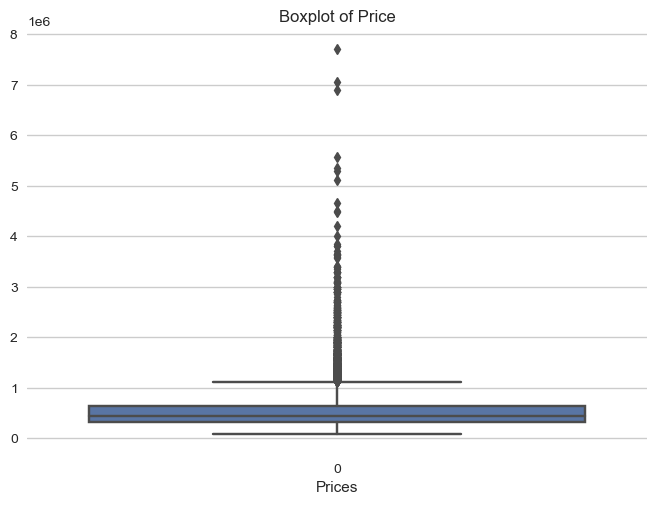

In [29]:
# Create a list of columns to include in the boxplot
columns = ['price', 'sqft_lot']

# Create the boxplot
sns.boxplot(kc_hses.price)

# Add a title and labels for the axes
plt.title('Boxplot of Price')
plt.xlabel('Prices')

# Display the plot
plt.show()

In [30]:
#This code selects the 99.0% of prices in clean_data that fall between the 0.5th percentile and the 99.5th percentile of prices. 
#This effectively removes the top and bottom 0.25% of prices, which are likely outliers.

kc_hses = kc_hses[(kc_hses.price < kc_hses.price.quantile(.995)) 
                        & (kc_hses.price > kc_hses.price.quantile(.005))]


``Note``: There are numerous outliers within the price column hence dropping would be unwise.

* BEDROOMS

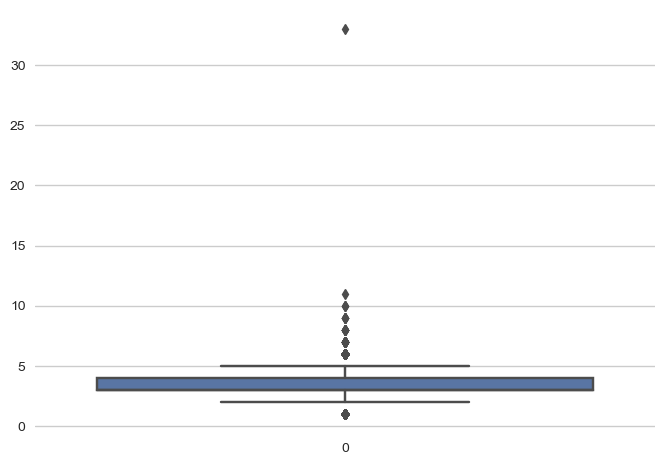

In [31]:
# Let's look at the bedrooms
sns.boxplot(kc_hses['bedrooms']);

``Note:``From the above boxplot, it's clear that there are outliers. Before handling them, we went ahead and looked at the description of the bedroom column

In [32]:
kc_hses.bedrooms.describe()

count    21203.000000
mean         3.374334
std          0.919347
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

In [33]:
# We see the outlier on bedrooms that we change to 3 bedrooms, likely due to a typographic error
# we Change to 3 since it's the average number of bedrooms.
kc_hses.loc[(kc_hses.bedrooms == 33), 'bedrooms'] = 3

* BATHROOMS

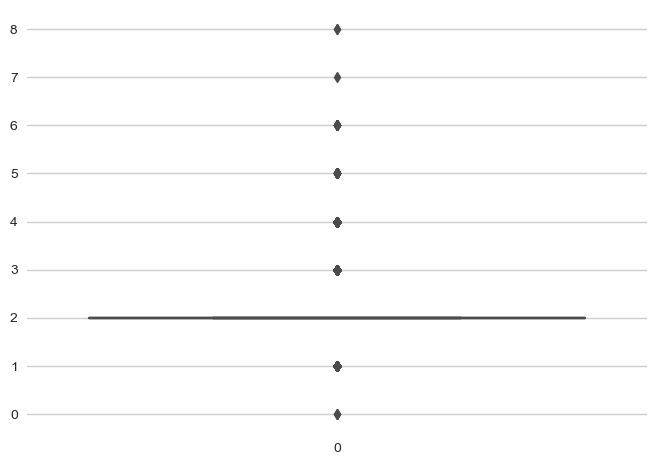

In [34]:
# Let's look at the bedrooms
sns.boxplot(kc_hses['bathrooms']);

### 3.1 Univariate Analysis

``univariate Analysis`` refers to the analysis of a single variable or data set, typically using statistical methods.

> In this section, we'll explore each column in the dataset to see the distributions of features and obtain some useful insights. The main two parts in this section are: 
>   - Categorical Columns(Categorical df)
>   - Numerical Columns(numerical df)





* ``CATEGORICAL COLUMNS``

We defined a function below that will take in the categorical dataframe created above that contains the categorical columns, that is, ``Condition`` and ``Grade``.

In [35]:
# Fuction to get the value counts of the data in the columns
def get_value_counts(categorical_df, col):
    ''' Returns the value counts of a column in a dataframe '''
    counts = categorical_df[col].value_counts(dropna=False)
    return counts

# Function to visualise the the data in the columns
def plot_data(categorical_df, col, title):
    ''' Plots the value counts of a column in a dataframe as a bar chart '''
    get_value_counts(categorical_df, col).plot(kind='bar', figsize=(10, 5), color='lightgreen', edgecolor='black')
    plt.title(title)
    plt.xticks(rotation=45);

##### 2.1.1.4 Condition
> The condition column identifies the condition of the house.

Average      13900
Good          5643
Very Good     1687
Fair           162
Poor            28
Name: condition, dtype: int64


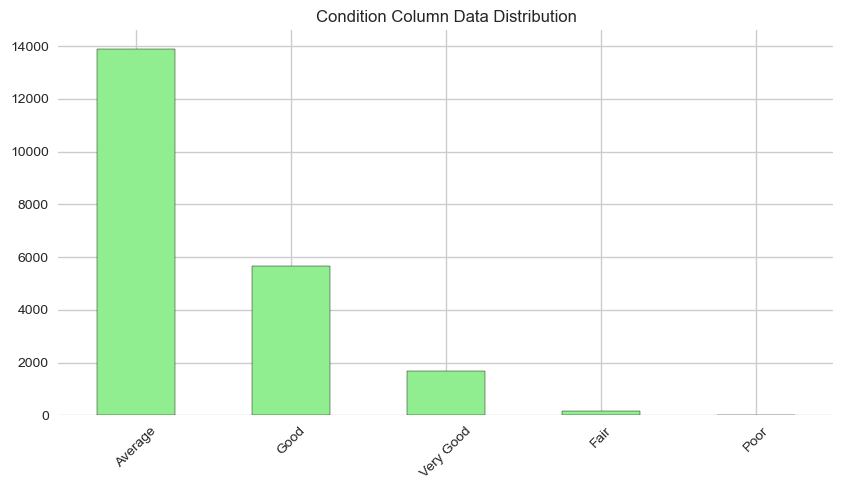

In [36]:
# Identify the unique values (and counts) in the 'condition' column
print(get_value_counts(categorical_df, 'condition'))

# Visualise the data distribution
plot_data(categorical_df, 'condition', 'Condition Column Data Distribution')

``Note:``
From the distribution above, we can observe the following:

We can observe that the majority of the residences in the dataset are in ```average condition``` from the distribution above and the least lies in ``poor condition``

- Average      13900
- Good          5643
- Very Good     1687
- Fair           162
- Poor            28



##### 2.1.1.4. Grade

> The grade column describes the home's building and design excellence. The grade corresponds to the caliber of the upgrades' construction. There are 13 grade levels.

Average      8889
Good         6041
Better       2606
Low          2022
Very         1130
Excellent     396
Fair          234
Luxury         88
Mansion        13
Poor            1
Name: grade, dtype: int64


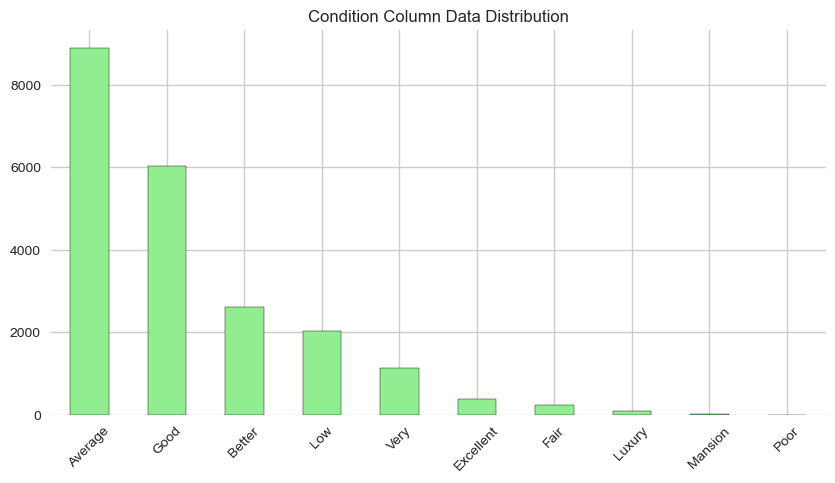

In [37]:
# Identify the unique values (and counts) in the 'condition' column
print(get_value_counts(categorical_df, 'grade'))

# Visualise the data distribution
plot_data(categorical_df, 'grade', 'Condition Column Data Distribution')


``Observations:``

Majority of the houses in this dataset range in grade level ``Average`` with ``8889`` houses and the least range in the grade level  ``poor`` with ``1`` house.

* ``NUMERICAL COLUMNS``


We defined a function below that will take in the categorical dataframe created above that contains the numerical  columns which are price, bedrooms, bathrooms, 'sqft_living, 'sqft_lot, floors,
       'waterfront, view, sqft_above, sqft_basement, yr_built,
       zipcode, lat, long, sqft_living15, sqft_lot15, month,
       renovated_year, renovated, house_age, Sale_year.


In [38]:
# Function to describe the data and plot the histogram, kde and boxplot of the data
def desc_and_plot(df, col, title, bins_='auto'):
    ''' Describes and Plots the distribution of a column in a dataframe as a histogram, kde and boxplot '''
    print(df[col].describe())
    # creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(10, 5))
    
    # assign a graph to each ax
    sns.boxplot(df[col], ax=ax_box, color='lightgreen')
    sns.histplot(data=df, x=col, ax=ax_hist, kde=True, color='lightgreen', bins=bins_, edgecolor='black')
    plt.suptitle(title)
    plt.tight_layout();

``1. PRICE``

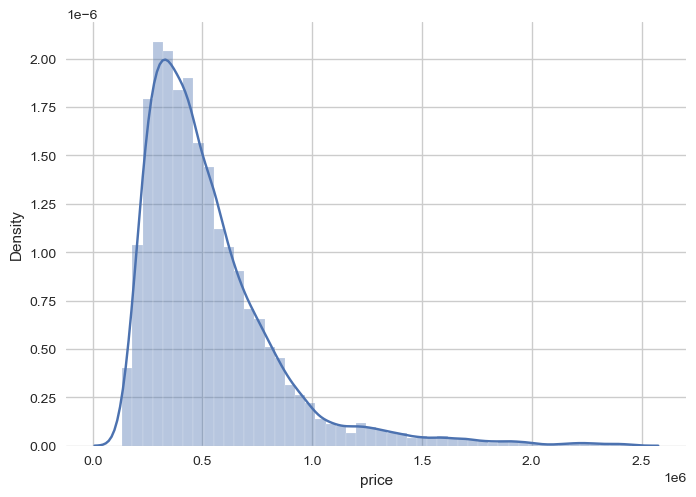

In [39]:
#Visualize price
sns.distplot(kc_hses['price'], kde=True)
plt.show();

``Observation``:

Price is normally distributed although skewed to the right. There may be outliers causing the skew. In the context of realestate these outliers may be valid and may not warrant dropping.

We are going to improve on the skewness using ``Log Transformation`` with an aim to increase correlation

*``Dealing with Skewness in our data``*

In [40]:
# use Log Transformation to deal with the skewness in the price column
kc_hses["log(price)"] = np.log(kc_hses["price"])
kc_hses[["log(price)"]].head()

,log(price)
0,12.309982
1,13.195614
2,12.100712
3,13.311329
4,13.142166


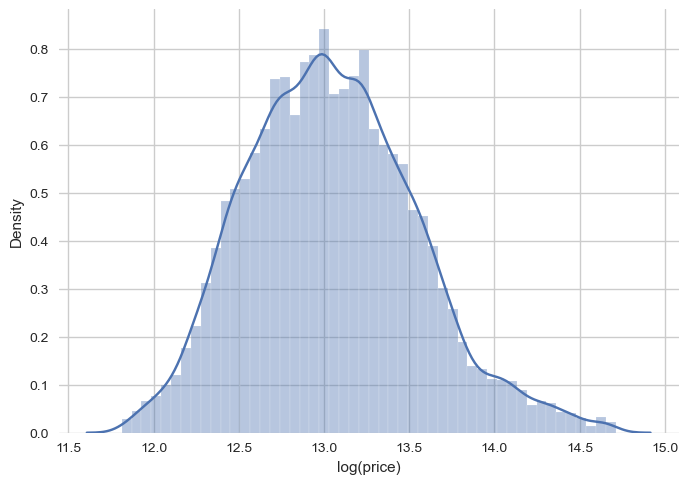

In [41]:
#Visualize the price using the logprice column after log transformation
sns.distplot(kc_hses['log(price)'], kde=True)
plt.show();

`` 2. Bathrooms``

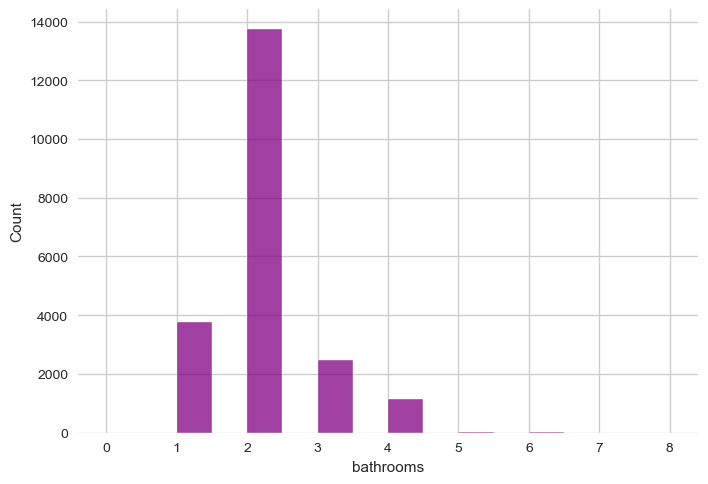

In [42]:

#plot bathrooms distribution
sns.histplot(kc_hses['bathrooms'], kde=False, color='purple')
plt.show();

#### ``Observation``
* Most properties seem to have 2 bathrooms on average. The kde function seems to look a bit strange owing to `bathrooms` beign a categorical feature.

``3. Year_built``

count    21203.000000
mean      1971.205395
std         29.355245
min       1900.000000
25%       1952.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64


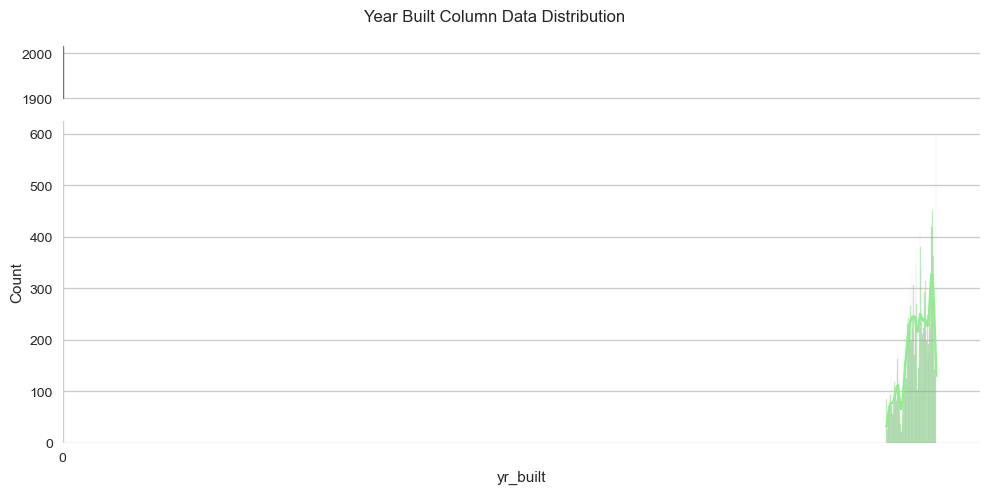

In [43]:
# Visualise 'yr_built' distribution
desc_and_plot(kc_hses, 'yr_built', 'Year Built Column Data Distribution', 115)

#### Observation
* From the distributions above we can see that the data is slightly skewed to the left. 
* The oldest house in the dataset was built in 1900, and the newest house in the dataset was built in 2015.
* The mean year the houses in the dataset were built is 1971, and the median year the houses in the dataset were built is 1975. 
* The standard deviation of the year built column is 29.37

We are going to improve on the skewness using ``Log Transformation``

In [44]:
# use Log Transformation to deal with the skewness in the price column
kc_hses["log(yr_built)"] = np.log(kc_hses["yr_built"])
kc_hses[["log(yr_built)"]].head()

,log(yr_built)
0,7.578145
1,7.576097
2,7.566828
3,7.583248
4,7.594381


count    21203.000000
mean         7.586289
std          0.014948
min          7.549609
25%          7.576610
50%          7.588324
75%          7.599401
max          7.608374
Name: log(yr_built), dtype: float64


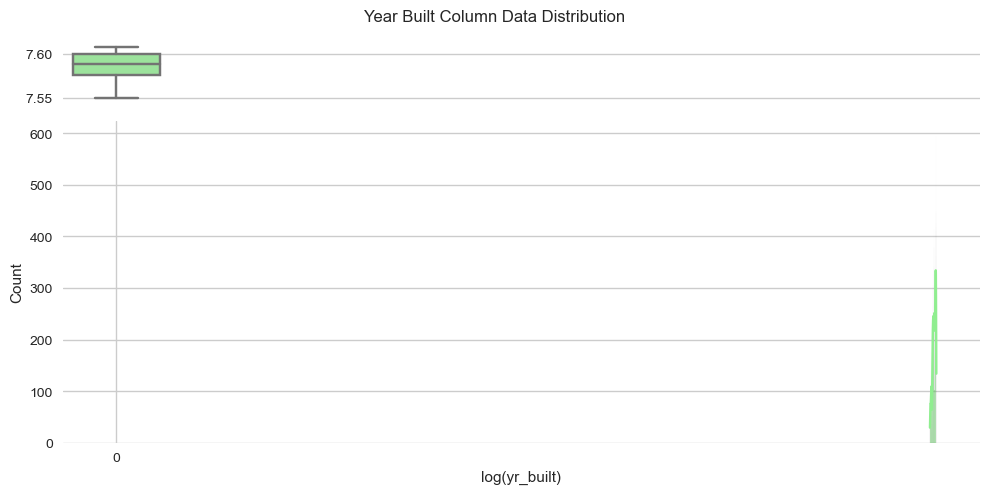

In [45]:
#Visualize the yr_built using the log(yr_built) column after log transformation
desc_and_plot(kc_hses, 'log(yr_built)', 'Year Built Column Data Distribution', 115)

``4. Bedrooms``

count    21203.000000
mean         3.372919
std          0.896553
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         11.000000
Name: bedrooms, dtype: float64


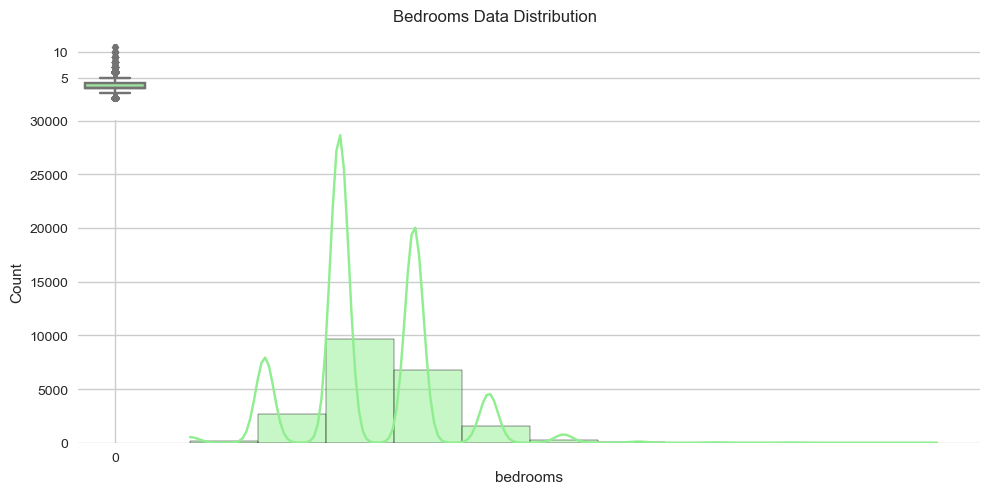

In [46]:
desc_and_plot(kc_hses, 'bedrooms', 'Bedrooms Data Distribution', 11)

#### Observation

* The maximum number of bedrooms in the dataset in 11
* The minimum number of bedrooms in the dataset is 1
* The mean number of mean number of bedrooms is 3.37 and the median number of bedrooms is 3.
* The standard deviation of the bedroom column is 0.93

``5. Bathrooms``

count    21203.000000
mean         2.056832
std          0.735983
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          8.000000
Name: bathrooms, dtype: float64


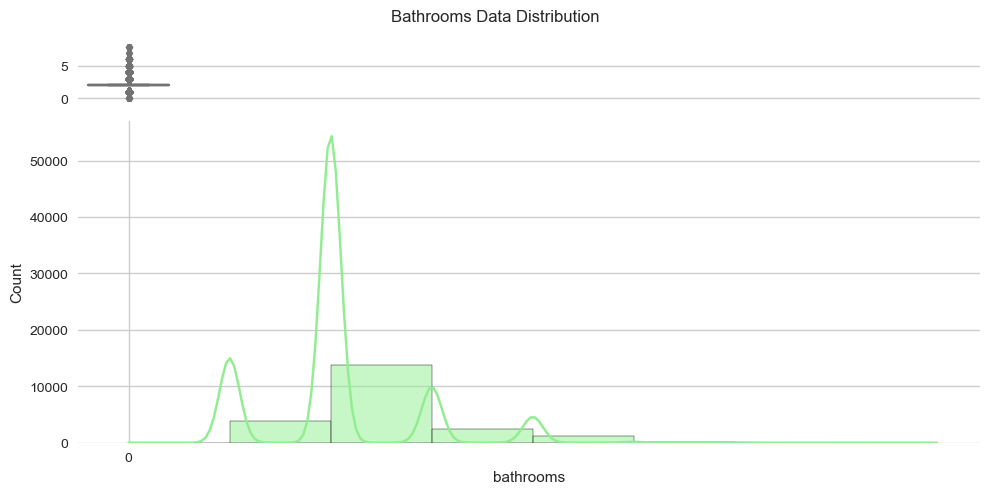

In [47]:
#plot bathrooms distribution
desc_and_plot(kc_hses, 'bathrooms', 'Bathrooms Data Distribution', 8)

``Observation``

* The maximum number of bathrooms in the dataset in 8
* The minimum number of bathrooms in the dataset is 0
* The mean number of mean number of bathroomsis 2.06 and the median number of bedrooms is 2.
* The standard deviation of the bathrooms column is 0.735983.

### 3.2 Bivariate Analysis

``Bivariate Analysis`` refers to the analysis of a two variable or data set, typically using statistical methods.

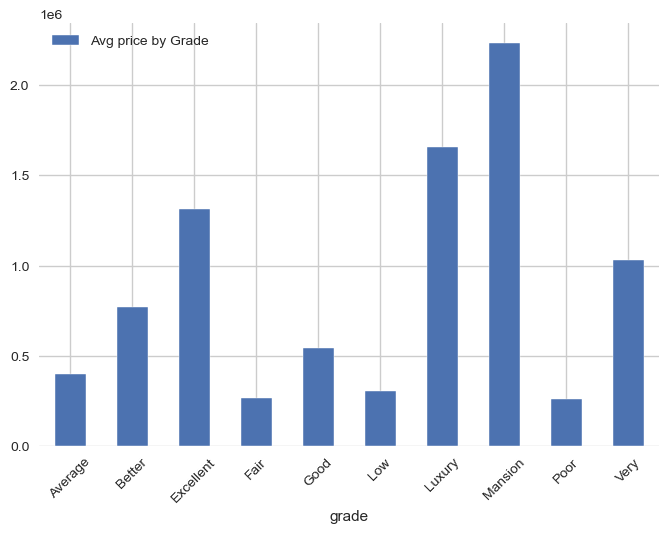

In [48]:
#plot bar of Grade against price
kc_hses.groupby('grade')['price'].mean().plot.bar(x='grade', label='Avg price by Grade')
plt.xticks(rotation=45)
plt.legend()
plt.show()

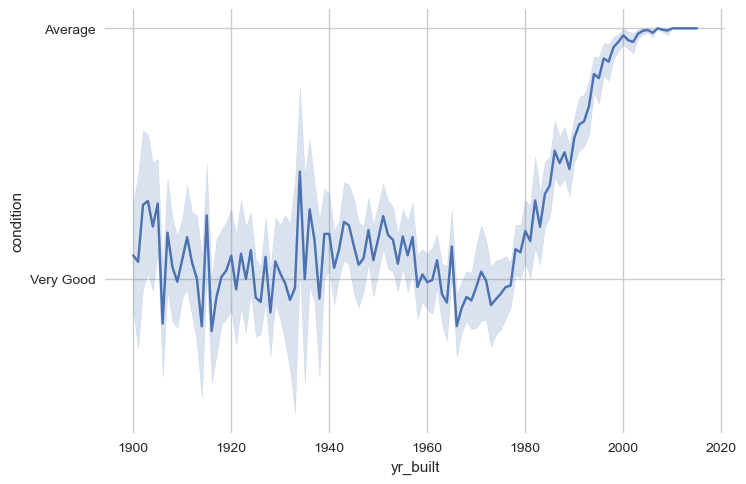

In [49]:
#plot barchart of 'condition' against 'year built'
sns.lineplot(x='yr_built', y='condition', data=kc_hses)
plt.show();

``Observation``

* For most houses built in the $20th$ century *i.e* 1900-early 1990s houses were in Very good condition. 
* For most houses built from the begining of the $21st$ century, the condition is Average. There seems to be a decline in condition of houses built over time

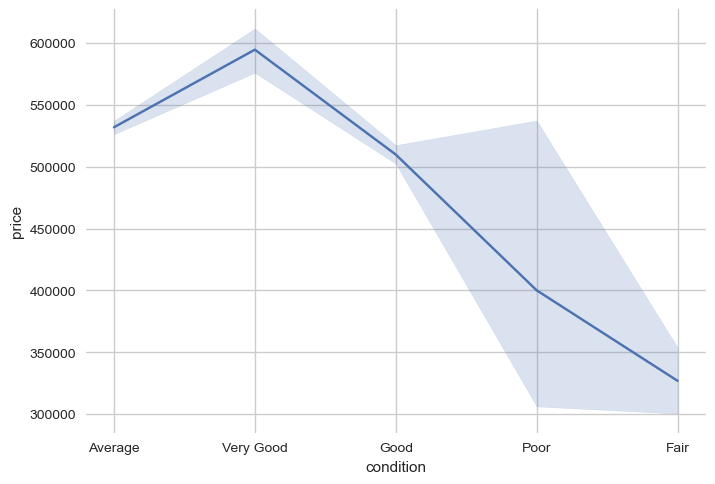

In [50]:
#plot barchart of 'condition' against 'year built'
sns.lineplot(x='condition', y='price', data=kc_hses)
plt.show();

``Observation``

* The price decreases as the condition of the houses deteroriates.
* However, It appears in the graph that the houses with poor condition are more expensive compared to the ones that have fair condition which should be investigated.

### 3.3 Multivariate Analysis

``Multivariate Analysis`` refers to the analysis of more than two variable or data set, typically using statistical methods.

* Below is a plot to show the relationship between ``price`` and the other variables created in the ``numerical_list`` created above.
      

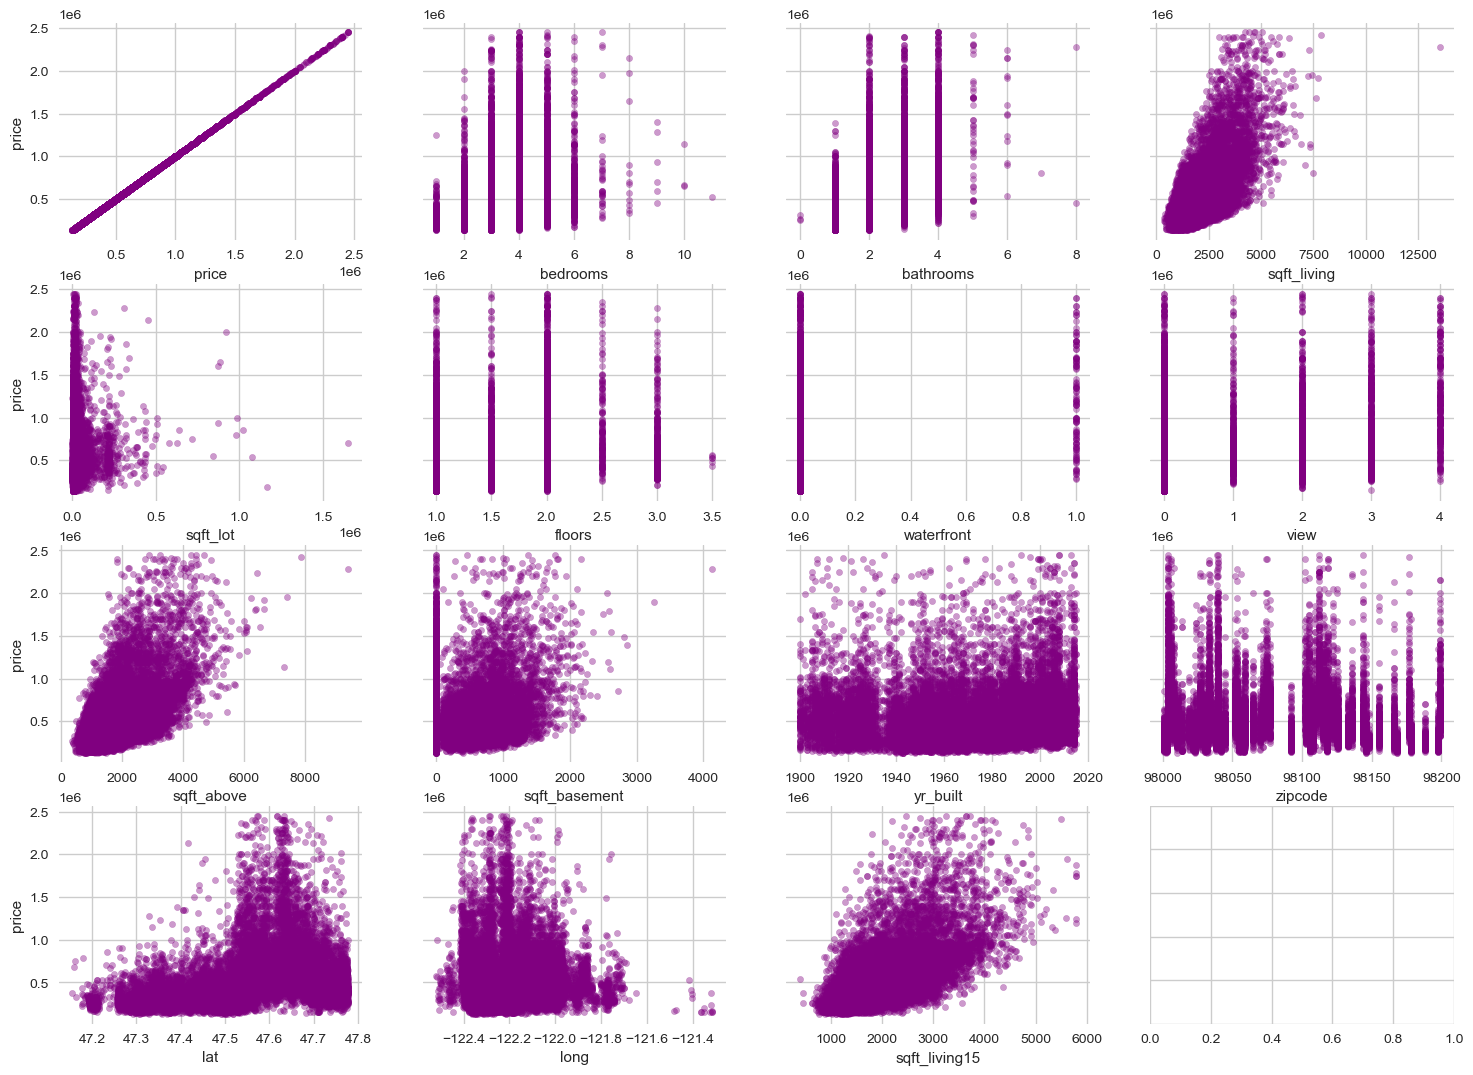

In [51]:
#plot scatter plots of all features against price
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(18,13))
axes = axes.flatten() # flatten the array to make it easier to iterate over

for i, xcol in enumerate(numerical_list[0:15]):
    kc_hses.plot(kind='scatter', x=xcol, y='price', ax=axes[i], alpha=0.4, color='purple', sharey=True)
    
plt.show() # add this to display the plot

``Observations``


From the plots above,we can observe that some of the relationships within the variable are linear while other are non-linear.

* Below is a plot to show the relationship between ``price`` and ``price``,``bathrooms`,`sqft_living`,`sqft_above`,`floors`.

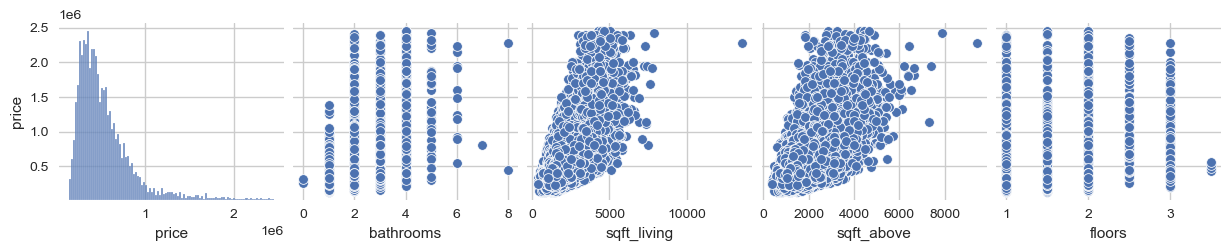

In [52]:
#plot scatterplots of selected features
xvars = ['price', 'bathrooms', 'sqft_living', 'sqft_above', 'floors']#selected features
yvars = ['price']
sns.pairplot(kc_hses, x_vars=xvars, y_vars=yvars)
plt.show();

``Observations:``


- `sqft-living` and `sqft_above` seem to have a linear relationship with `price`

# 3.0 CORRELATION MATRIX

* ####  We plotted a correlation matrix to have a look at the correlation between all the variables

In [53]:
#plot correlation heatmap
kc_hses_correlation = kc_hses.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
# convert all features that have a correlation to price of more than 0.3
kc_hses_correlation

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,month,renovated_year,renovated,house_age,Sale_year,log(price),log(yr_built)
price,1.00,0.32,0.50,0.68,0.10,0.27,0.16,0.37,0.59,0.29,0.05,-0.04,0.34,0.03,0.60,0.09,-0.02,0.11,nan,-0.05,0.01,0.94,0.05
bedrooms,0.32,1.00,0.49,0.59,0.03,0.18,-0.02,0.07,0.49,0.30,0.16,-0.16,-0.02,0.14,0.40,0.03,-0.00,0.01,nan,-0.16,-0.01,0.33,0.16
bathrooms,0.50,0.49,1.00,0.69,0.09,0.36,0.03,0.18,0.58,0.31,0.38,-0.14,0.04,0.15,0.48,0.09,0.01,0.06,nan,-0.38,-0.02,0.50,0.38
sqft_living,0.68,0.59,0.69,1.00,0.18,0.35,0.05,0.25,0.87,0.41,0.33,-0.20,0.04,0.25,0.75,0.19,0.01,0.04,nan,-0.33,-0.03,0.67,0.33
sqft_lot,0.10,0.03,0.09,0.18,1.00,-0.01,0.02,0.07,0.19,0.01,0.05,-0.13,-0.09,0.23,0.14,0.72,-0.00,0.00,nan,-0.05,0.01,0.10,0.05
floors,0.27,0.18,0.36,0.35,-0.01,1.00,0.01,0.02,0.52,-0.26,0.49,-0.06,0.04,0.13,0.27,-0.01,0.01,0.00,nan,-0.49,-0.02,0.30,0.49
waterfront,0.16,-0.02,0.03,0.05,0.02,0.01,1.00,0.35,0.03,0.05,-0.03,0.04,-0.02,-0.04,0.05,0.03,0.00,0.07,nan,0.03,-0.00,0.12,-0.03
view,0.37,0.07,0.18,0.25,0.07,0.02,0.35,1.00,0.14,0.26,-0.06,0.10,-0.00,-0.08,0.26,0.07,-0.01,0.09,nan,0.06,0.00,0.32,-0.06
sqft_above,0.59,0.49,0.58,0.87,0.19,0.52,0.03,0.14,1.00,-0.09,0.43,-0.26,-0.01,0.36,0.73,0.20,0.01,0.01,nan,-0.43,-0.02,0.58,0.43
sqft_basement,0.29,0.30,0.31,0.41,0.01,-0.26,0.05,0.26,-0.09,1.00,-0.14,0.08,0.10,-0.15,0.18,0.02,0.01,0.06,nan,0.14,-0.02,0.29,-0.14


``Observation:``

We see Strong positive correlation between `price` and the features: `bathrooms`, `sqft_living` and `sqft_above`, 

In [54]:
#dropping the following columns  lat, sqft_living15, zipcode, long, floors, sqft_lot15
cols_to_drop = ['lat','sqft_living15','long', 'sqft_lot15']
kc_hses.drop(cols_to_drop, axis=1, inplace=True)
kc_hses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21203 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           21203 non-null  float64
 1   bedrooms        21203 non-null  int64  
 2   bathrooms       21203 non-null  int64  
 3   sqft_living     21203 non-null  int64  
 4   sqft_lot        21203 non-null  int64  
 5   floors          21203 non-null  float64
 6   waterfront      21203 non-null  int64  
 7   view            21203 non-null  int64  
 8   condition       21203 non-null  object 
 9   grade           21203 non-null  object 
 10  sqft_above      21203 non-null  int64  
 11  sqft_basement   20757 non-null  float64
 12  yr_built        21203 non-null  int64  
 13  zipcode         21203 non-null  int64  
 14  month           21203 non-null  int64  
 15  renovated_year  21203 non-null  int64  
 16  renovated       21203 non-null  int64  
 17  house_age       21203 non-null 

``Observation``:

* The above columns were dropped because they don't have strong correlation with the `price` that is to say ,they are not the high determinant influencing the houses' prices.

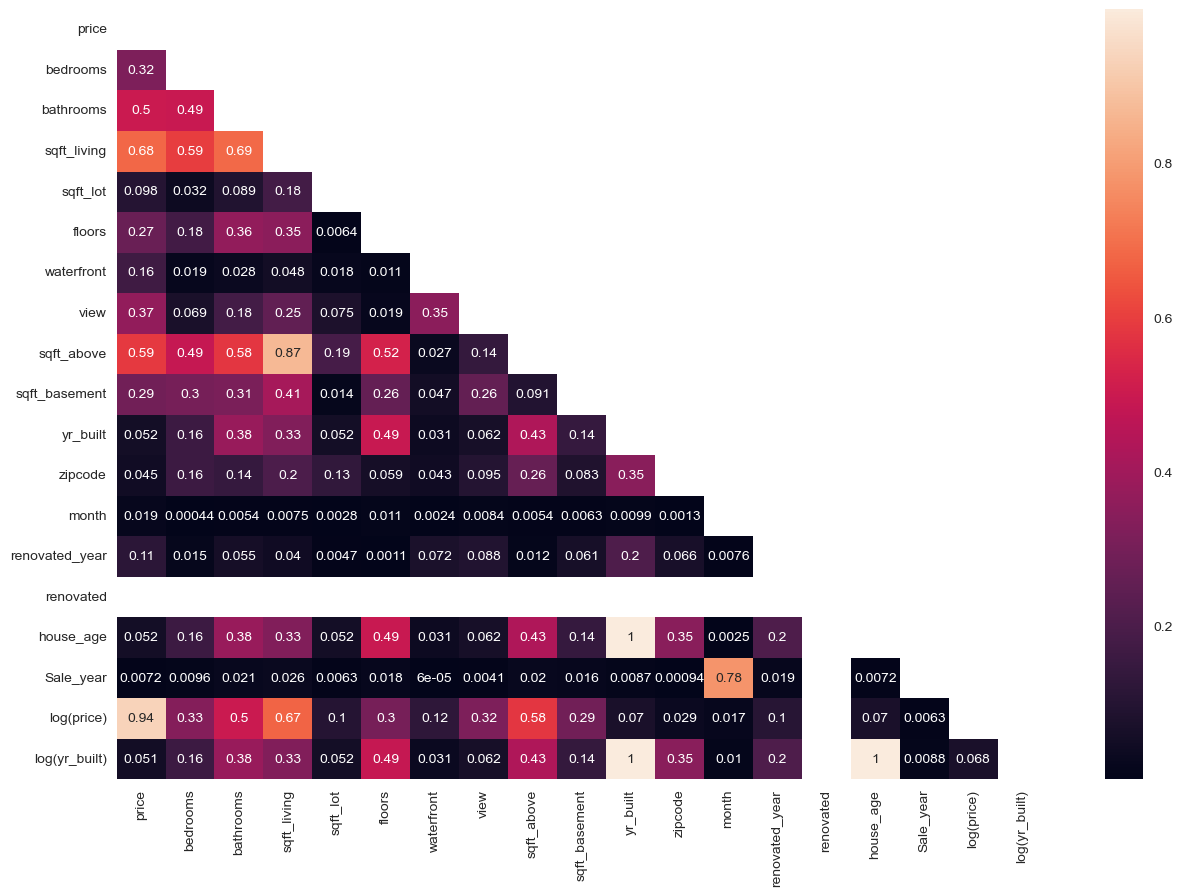

In [55]:
#correlation heat map after dropping
corr = kc_hses.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(15, 10))
sns.heatmap(kc_hses.corr().abs(), annot=True, mask=mask);

``Observations``:

`sqft_above` is strongly correlated with `sqft_living`. This may be because living space are typycally located above ground. In this case we may drop `sqft_above` to prevent **multicollinearity** issues in the model. We can also drop `sqft_lot`.

In [56]:
#drop columns that are correlated to sqft_living
drop_these = ['sqft_above', 'sqft_lot']
kc_hses.drop(drop_these, axis=1, inplace=True)
kc_hses.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'sqft_basement', 'yr_built', 'zipcode',
       'month', 'renovated_year', 'renovated', 'house_age', 'Sale_year',
       'log(price)', 'log(yr_built)'],
      dtype='object')

``Observations``:
* For most houses built in the $20th$ century *i.e* 1900-early 1990s houses were in Very good condition. 
* For most houses built from the begining of the $21st$ century, the condition is Average. There seems to be a decline in condition of houses built over time

## 4. Data Preparation

In [57]:
#Checking for the highest correlated variables with the Log(price)
kc_hses.corr()['log(price)'].sort_values()

house_age        -0.069895
zipcode          -0.028766
month            -0.017148
Sale_year         0.006326
log(yr_built)     0.068393
yr_built          0.069994
renovated_year    0.102287
waterfront        0.122127
sqft_basement     0.291451
floors            0.303617
view              0.319804
bedrooms          0.332808
bathrooms         0.497994
sqft_living       0.673382
price             0.935780
log(price)        1.000000
renovated              NaN
Name: log(price), dtype: float64

#### Observation
>sqft_living has the highest correlation with the log price of 0.67 compared to the other columns.

###  ONE-HOT-ENCODING FOR THE CATEGORICAL VARIABLES

In [58]:
# Initialize LabelEncoder
le = LabelEncoder()
kc_hses['grade_idx'] = le.fit_transform(kc_hses['grade'])
kc_hses['condition_idx'] = le.fit_transform(kc_hses['condition'])
# Checking if the columns have been encoded
kc_hses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21203 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           21203 non-null  float64
 1   bedrooms        21203 non-null  int64  
 2   bathrooms       21203 non-null  int64  
 3   sqft_living     21203 non-null  int64  
 4   floors          21203 non-null  float64
 5   waterfront      21203 non-null  int64  
 6   view            21203 non-null  int64  
 7   condition       21203 non-null  object 
 8   grade           21203 non-null  object 
 9   sqft_basement   20757 non-null  float64
 10  yr_built        21203 non-null  int64  
 11  zipcode         21203 non-null  int64  
 12  month           21203 non-null  int64  
 13  renovated_year  21203 non-null  int64  
 14  renovated       21203 non-null  int64  
 15  house_age       21203 non-null  int64  
 16  Sale_year       21203 non-null  int64  
 17  log(price)      21203 non-null 

#### observation
> We have transformed categorical columns that is grade and condition  columns and renamed them as 'grade_idx' and 'condition_idx'

In [59]:
# created a new dataframe called data for modelling
data = kc_hses

#Declared the independent and dependent variables
y = data['log(price)']
X = data.drop(columns=['price','log(price)','yr_built','zipcode','renovated_year','house_age','Sale_year','log(yr_built)','month','sqft_basement','grade','condition'], axis=1)


In [60]:
#confirming the remaining columns after dropping form the above cell
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21203 entries, 0 to 21596
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21203 non-null  int64  
 1   bathrooms      21203 non-null  int64  
 2   sqft_living    21203 non-null  int64  
 3   floors         21203 non-null  float64
 4   waterfront     21203 non-null  int64  
 5   view           21203 non-null  int64  
 6   renovated      21203 non-null  int64  
 7   grade_idx      21203 non-null  int64  
 8   condition_idx  21203 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 2.1 MB


 ###  LOG TRANSFORMED BASE MODEL

* For our mode, we assuming an alpha level of `0.05`

In [61]:
#building our log transformed base model
log_mod = sm.OLS(y, sm.add_constant(X)).fit()
log_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log(price)   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     2679.
Date:                Thu, 20 Apr 2023   Prob (F-statistic):               0.00
Time:                        08:06:13   Log-Likelihood:                -8018.8
No. Observations:               21203   AIC:                         1.606e+04
Df Residuals:                   21194   BIC:                         1.613e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.1906      0.012   1052.170      0.000      12.168      12.213
bedrooms         -0.0489      0.003    -14.100      0.000      -0.056      -0.042
bathrooms         0.0453      0.005      9.701      0.000       0.036       0.054
sqft_living       0.0003   4.42e-06     77.737      0.000       0.000       0.000
floors            0.0910      0.005     17.735      0.000       0.081       0.101
waterfront        0.2593      0.036      7.283      0.000       0.190       0.329
view              0.0918      0.004     25.372      0.000       0.085       0.099
renovated      6.362e-16   6.82e-17      9.323      0.000    5.02e-16     7.7e-16
grade_idx         0.0107      0.001     10.467      0.000       0.009       0.013
condition_idx     0.0384      0.002     19.078      0.000       0.034       0.042
==============================================================================
Omnibus:                        3.880   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.144   Jarque-Bera (JB):                3.853
Skew:                           0.023   Prob(JB):                        0.146
Kurtosis:                       2.953   Cond. No.                     3.29e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.93e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

``Observations from our base model:``

* An R-squared value of 0.503 means that approximately 50.3% of the variance of the data is explained by the model
*Prob(F-statistics) is 0.0 which is is below 0.05 which has a statistical significant
*Constant is 12.27 when X is zero Y(log_price) is 12.27 in other words its the Y intercept
*With 1 unit increase in bedrooms it leads to 0.0489	decrease in log_price
*With 1 unit increase in bathrooms it leads to 0.0453 increase in log_price
*With 1 unit increase in sqft_living it leads to 0.0003 increase in log_price
*With 1 unit increase in floors it leads to 0.0910 increase in log_price
*With 1 unit increase in waterfront it leads to 0.2593 increase in log_price
*With 1 unit increase in review it leads to 0.0918 increase in log_price
*With 1 unit renovated results to 6.362e-16 increases in log_price
*With 1 unit increase in grade_idx it leads to 0.0107 increase in log_price
*With 1 unit increase in condition_idx it leads to 0.0384 increase in log_pric

### Assumption for Linear Regression in our model

1. *Linearity*

The dependent variable and the independent variable(s) should have a linear relationship.

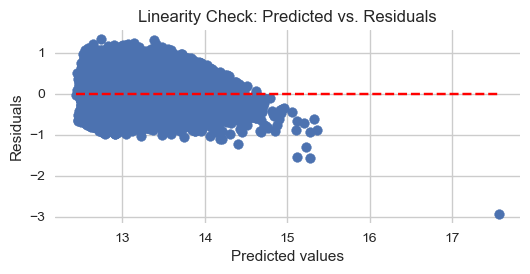

In [62]:
def linearity(model):
    # Calculate the fitted values and residuals of the model
    fitted_y = model.fittedvalues
    residuals = model.resid
    
    # Create a scatter plot of the predicted values (fitted values) against the residuals
    fig, ax = plt.subplots(figsize=(6, 2.5))
    _ = ax.scatter(fitted_y, residuals)

    # Add a horizontal line at y=0 to help visualize the deviations of the residuals from the line
    ax.hlines(y=0, xmin=fitted_y.min(), xmax=fitted_y.max(), colors='r', linestyles='--')
    
    # Set the x-axis label to 'Predicted values', the y-axis label to 'Residuals', and the plot title to 'Linearity Check: Predicted vs. Residuals'
    ax.set_xlabel('Predicted values')
    ax.set_ylabel('Residuals')
    ax.set_title('Linearity Check: Predicted vs. Residuals')
    
    # Display the plot
    plt.show()

# Call the linearity function with a linear regression model as an argument to check for linearity
linearity(log_mod)


``Observation``

From the above graph, we can clearly say that there is no linearity and there is an observed outlier.

2. *Homoscedasticity*: 

For all values of the independent variable, the variance of the errors (residuals) should be constant (s). This indicates that for all values of the independent variable, the spread of the residuals should be the same (s).

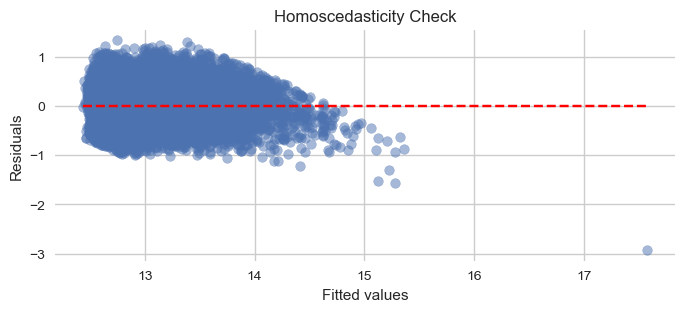

In [63]:
def homoscedasticity(model):
    # Get the residuals and fitted values of the model
    residuals = model.resid
    fitted_y = model.fittedvalues
    
    # Create a scatter plot of the fitted values against the residuals
    fig, ax = plt.subplots(figsize=(8, 3))
    _ = ax.scatter(fitted_y, residuals, alpha=.5)

    # Add a horizontal line at y=0 to help visualize the deviations of the residuals from the line
    ax.hlines(y=0, xmin=fitted_y.min(), xmax=fitted_y.max(), colors='r', linestyles='--')
    
    # Set the x-axis label to 'Fitted values', the y-axis label to 'Residuals', and the plot title to 'Homoscedasticity Check'
    ax.set_xlabel('Fitted values')
    ax.set_ylabel('Residuals')
    ax.set_title('Homoscedasticity Check')
    
    # Display the plot
    plt.show()

# Call the homoscedasticity function with a linear regression model as an argument to check for homoscedasticity
homoscedasticity(log_mod)


``Observation``

There is a cone-shaped pattern in the spread of the variables hence it is ``heteroscedastic``

3. *Independence*: 

The observations ought to stand alone from one another. This implies that the dependent variable's value for one observation shouldn't be changed by the dependent variable's value for another observation.

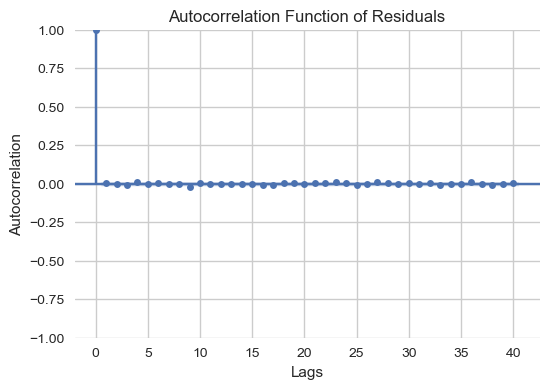

In [64]:
def independence(residuals):
    fig, ax = plt.subplots(figsize=(6,4))
    _ = sm.graphics.tsa.plot_acf(residuals, lags=40, ax=ax)
    ax.set_xlabel('Lags')
    ax.set_ylabel('Autocorrelation')
    ax.set_title('Autocorrelation Function of Residuals')
    plt.show()

independence(log_mod.resid)

``Observation``

From the graph above, we can make an observation that there are residuals.

### Perform a train and test split

In [65]:
#Split into testing and training sets and set random state 
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=.2,
                                                    random_state=42)




### Perfoming a linear Regression on our Train and Test Variables using SciKit Learn

In [68]:
def linear_model_sklearn(X, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    linreg = LinearRegression()
    linreg.fit(x_train, y_train)
    y_hat_train = linreg.predict(x_train)  # these are our prediction values
    y_hat_test = linreg.predict(x_test)
    print('the r2_score:', r2_score(y_test, y_hat_test), '\n')
    train_mae = mean_absolute_error(y_train, y_hat_train)
    test_mae = mean_absolute_error(y_test, y_hat_test)
    train_mse = mean_squared_error(y_train, y_hat_train)
    test_mse = mean_squared_error(y_test, y_hat_test)
    print('train MAE:', train_mae)
    print('test MAE:', test_mae, '\n')
    print('train MSE:', train_mse)
    print('test MSE:', test_mse, '\n')
    print('train root Mean squared Error: ', train_mse** 0.5)
    print('test root Mean squared Error: ', test_mse** 0.5, '\n')
    plt.scatter(y_train, y_hat_train,alpha=0.5,color='y',label='train')
    sns.regplot(x=y_train, y=y_hat_train, scatter=False, color='r',label='train')
    plt.scatter(y_test, y_hat_test,label='test')
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title('Actual Price vs Predicted Price')
    plt.scatter(x=y, y=y,color ='maroon',label='actual')
    plt.legend()

    ml =LinearRegression()
    ml.fit(x_train,y_train)

    y_pred = ml.predict(x_test)
    pred_y_df = pd.DataFrame({'Actual Values': y_test, 'Predicted Value' : y_pred, 'Difference' :abs(y_test-y_pred) , 'Percentage Difference' : abs((y_test-y_pred)/y_test*100)})
    mean_percentage = pred_y_df['Percentage Difference'].mean()
    print('mean_diff:', mean_percentage)
    return pred_y_df[0:5]

the r2_score: 0.5027368231129595 

train MAE: 0.288106503713127
test MAE: 0.2900549172193806 

train MSE: 0.124464998966159
test MSE: 0.12549717828988619 

train root Mean squared Error:  0.3527959735685188
test root Mean squared Error:  0.35425580911240706 

mean_diff: 2.224903703397973


,Actual Values,Predicted Value,Difference,Percentage Difference
6334,13.081541,13.520153,0.438612,3.352905
16523,12.779873,12.799739,0.019866,0.155444
16957,12.323856,12.763122,0.439267,3.564361
10074,14.457364,14.912565,0.455201,3.148575
16872,13.137252,12.921588,0.215664,1.641624


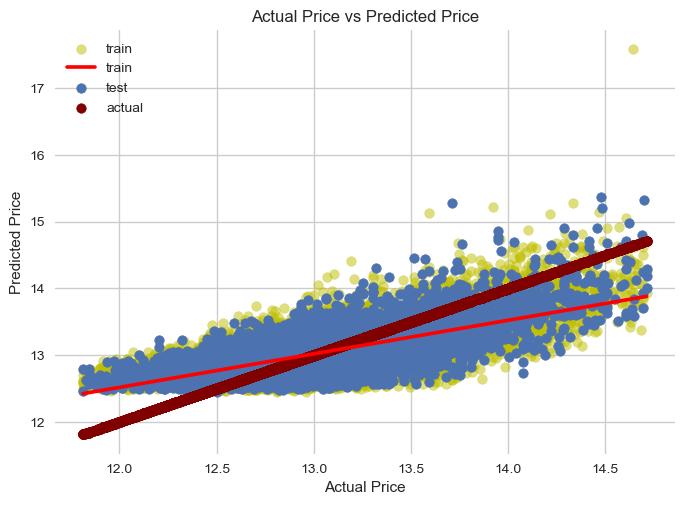

In [69]:
linear_model_sklearn(X, y)

#### Observations from our base model:

*The Mean absolute Error(mae) of the Train is 28.9% while the  Mean absolute Error(mae) for test  is 28.8%

*The mean_squared_errorr(mse) of the Train is 12.5% while the   mean_squared_error(mse) for test  is 12.3%

*The root Mean squared Error(rmse) of the Train is 35.4% while the root Mean squared Erro(rmse) for test  is 35.1%

*r2_score is 51.1%  that is to say our model explains a 51.1% variance in  Price

### Define functions for Modelling

In [ ]:
#This function fits our model
def model(ind_variable, data):
    formula = 'price ~ ' + ' + '.join(ind_variable)
    multi_model = ols(formula, data).fit()
    multi_model_summ = multi_model.summary()
    return multi_model,multi_model_summ

In [ ]:

def assess(model):
    tr_preds=model.predict(X_train)
    te_preds=model.predict(X_test)
    y_tr = y_train
    y_te = y_test
# Format the string output using f-strings    
    print(f"Train R2: {r2_score(y_tr, tr_preds)}")
    print(f"Test R2: {r2_score(y_te, te_preds)}")
    print('----')
    print(f"Train RMSE: {mean_squared_error(y_tr, tr_preds, squared = False)}")
    print(f"Test RMSE: {mean_squared_error(y_te, te_preds, squared = False)}")
    print('----')
    print(f"Train MAE: {mean_absolute_error(y_tr, tr_preds)}")
    print(f"Test MAE: {mean_absolute_error(y_te, te_preds)}")

    
# Set Variables for graphing    
    tr_res= y_tr - tr_preds
    te_res= y_te - te_preds
    
# Graph Syntax   
    plt.scatter(tr_preds, tr_res, label = 'Train')
    plt.scatter(te_preds, te_res, label = 'Test')
    
    plt.axhline(y=0, color = 'red', label = '0')
    plt.xlabel('predictions')
    plt.ylabel('residuals')
    plt.legend()
    plt.show

In [ ]:
# This function standardizes our model features
def scaled_model(ind_variable, data):
    formula = 'price ~ ' + ' + '.join(ind_variable)
    data_scaled = (data - np.mean(data)) / np.std(data)
    model_scaled = ols(formula, data_scaled).fit()
    model_scaled_summ = model_scaled.summary()
    return model_scaled_summ

In [ ]:
def model_and_assess(ind_variable, data):
    multi_model, multi_model_summ = model(ind_variable,data)
    assessment = assess(multi_model)
    scaled_summ = scaled_model(ind_variable,data)
    qq = sm.graphics.qqplot(multi_model.resid, dist=stats.norm, line='45', fit=True)
    print('        ')
    print('This is the summary of the model')
    print('        ')
    print(multi_model_summ)   
    print('        ')
    print('This is the summary of the scaled model')
    print('        ')
    print(scaled_summ)        
    print('        ')
    print('This is the correlation table between variables')
    print('        ')
    print(data[ind_variable].corr())    
    print('        ')
    print('This is the residual plot and qq plot')
    print('        ')
    print(assessment)
    print(qq)

In [ ]:
model_and_assess(['sqft_living', 'bedrooms', ], data)

#### ``Observations from our base model:``
#### TRAIN
* An R-squared value of 0.477 means that approximately 47,7% of the variance of the data is explained by the model
*Prob(F-statistics) is 0.0 which is is below 0.05 hence has a statistical significant
*Constant is 1.328e+05 when X is zero Y(price) is 1.328e+05 in other words its the Y intercept
*With 1 unit increase in sqft_living  of the train leads to 267.5183 increase in price
*With 1 unit increase in bedrooms of the train leads to -4.675e+04  decrease in price
#### TEST
* An R-squared value of 0.477 means that approximately 47,7% of the variance of the data is explained by the model
*Prob(F-statistics) is 0.0 which is is below 0.05 hence has a statistical significant
*Constant is -1.561e-16  when X is zero Y(price) is -1.561e-16  in other words its the Y intercept
*With 1 unit increase in sqft_living  of the test leads to 0.7631 increase in price
*With 1 unit increase in bedrooms of the test leads to -0.1361 decrease in price

## Regression Results 

##   Conclusion

## Recommendations